# 🧑‍🎓 Student:
- Marwan MASHRA

### Credits :
in collaboration with Yihan ZHONG

# TP 4 : Approximation Functions

We want to extend the methods we have seen for discrete state spaces to 
to problems with arbitrarily large state spaces. In the case of a video game for example, the number of possible images is much larer than the number of atoms in the universe. We can't expect to find an optimal policy or the optimal value function. 
Our goal instead is to find a good approximate solution using limited computational resources. 

Because we will encounter states never seen before, we need to use data from previous encounter to perform generalization. We will see function approximation as a generalization method. You will probably be happy to find out that function approximation is a supervised learning problem, and as such we will be using methods you have seen in traditional Machine Learning courses.

In [1]:
# Packages to install
# !pip install scikit-learn
#!pip install pyglet==1.5.27
# If you have errors with libGL, try in the terminal with your conda env activated :
# conda install -c conda-forge libstdcxx-ng

## Presentation of the Environment

In this project, you are asked to solve the classic Mountain Car (https://gym.openai.com/envs/MountainCar-v0/). Unlike previous environment, states are continuous so that you need to approximate the Q values Q(s, a). For more details about action and observation space, please refer to the OpenAI documentation here: https://github.com/openai/gym/wiki/MountainCar-v0

![](mountain_car.gif)


In [2]:
from environment import Mountain
import numpy as np

env = Mountain()
state = env.observe()
done = False
while not done:
    action = np.random.choice([0, 1, 2])
    state, reward, done = env.step_from_state(state, action)


In [3]:
import numpy as np


class RandomAgentQ:
    """Dummy Agent"""

    def __init__(self):
        pass

    def preprocessing(self, state):
        """
        Return the featurized representation of a state.
        """
        pass

    def act(self, state):
        """Output optimal action of a given state
        Return: action in [0, 1, 2]
        """
        return np.random.choice([0, 1, 2])

    def update(self, state, action, reward, new_state, terminal):
        """Receive a reward for performing given action.

        This is where your agent can learn.
        Input:
            state: current state
            action: action done in state
            reward: reward received after doing action in state
            new_state: next state
            terminal: boolean if new_state is a terminal state or not
        """
        pass

    def q(self, state, action):
        """Final Q function.
        Value (scalar): Q(state, action)
        """
        return np.random.uniform(0, 1)


Episode  1
Simulation step 0:
 ->       game: 1
 ->       observation: [-0.578505  0.      ]
 ->            action: 2
 ->            reward: -1.0
 -> cumulative reward: -1.0

Simulation step 1:
 ->       game: 1
 ->       observation: [-0.5770951   0.00140994]
 ->            action: 2
 ->            reward: -1.0
 -> cumulative reward: -2.0

Simulation step 2:
 ->       game: 1
 ->       observation: [-0.5742856   0.00280944]
 ->            action: 0
 ->            reward: -1.0
 -> cumulative reward: -3.0

Simulation step 3:
 ->       game: 1
 ->       observation: [-0.5720975   0.00218813]
 ->            action: 0
 ->            reward: -1.0
 -> cumulative reward: -4.0

Simulation step 4:
 ->       game: 1
 ->       observation: [-0.5705469   0.00155059]
 ->            action: 0
 ->            reward: -1.0
 -> cumulative reward: -5.0

Simulation step 5:
 ->       game: 1
 ->       observation: [-0.5696454   0.00090153]
 ->            action: 1
 ->            reward: -1.0
 -> cumulative

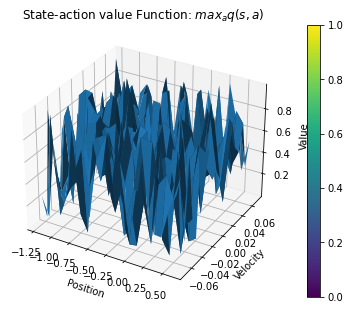

In [4]:
### Example code ###

from runner import FARunner
from environment import Mountain

n_episodes = 1
max_iter=100

env_class = Mountain
agent_class = RandomAgentQ


# Differentiate Between value and q based algorithms
type_values = ["state_action_value","state_value"]


# Running a Single Agent on a single environment.

my_runner = FARunner(env_class(), agent_class(), type_values[0], verbose=True)
final_reward = my_runner.loop(n_episodes,max_iter)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
import numpy as np
import gym
from gym.envs.classic_control import mountain_car
import keyboard
from time import time

def test_agent(agent_class, n_episodes=1, max_iter=100, verbose=False):
    env_class = Mountain
    # Differentiate Between value and q based algorithms
    if "q" in dir(agent_class):
        type_value = "state_action_value"
    elif "v" in dir(agent_class):
        type_value = "state_value"
    # Running a Single Agent on a single environment.
    agent = agent_class()
    my_runner = FARunner(env_class(), agent, type_value, verbose=verbose)
    final_reward = my_runner.loop(n_episodes, max_iter)
    return agent

def play(agent):
    env = gym.make("MountainCar-v0", render_mode="human")
    done = False
    observation = env.reset()[0]
    print("Press q to stop...")
    t = time()
    while not done:
        env.render()
        observation, reward, done, truncated, info = env.step(
            agent.act(observation)
        )  # take a random action
        if keyboard.is_pressed('q'):
            break
    env.close()
    if done:
        print(f'Agent reached goal in {(time()-t):.1f}s')

In [ ]:
agent = RandomAgentQ()
play(agent)

Press q to stop...


## Linear approximation of state Value $V(s)$ 

We first are going to consider an parametrized estimation of the value function $$v_\pi(s) \sim \hat{v}(s,\bold{\theta})$$ with parameters $\bold{\theta}$. You can think of the process of generalization in two different ways :
- We simplify the problem by computing similarity elements between states  -> feature learning
- We extend the behavior of the policy to multiple states -> Optimization on a parametrized function class 

### Monte-Carlo State Value Approximation

Q.1 Test the Linear Monte-Carlo State Value Approximation algorithm ( See Sutton Barto, 9.3 and 9.4) 

We are using randomly sampled features to represent the state space. ( see Barto - Sutton 9.5.2) $$ s \sim \bold{x}$$ with $\bold{x} = (x_1,...,x_n)$ is a decomposition on randomly sampled Fourier Coefficients.

Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20


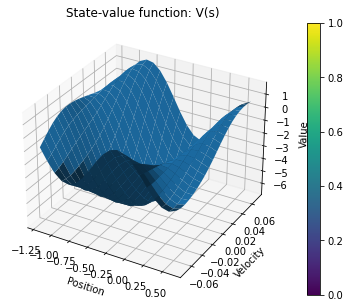

In [6]:
class MC_State_Value_Approximation:
    """ MC State-value Learning with Function Approximation
    """

    def __init__(self):
        """
        Init:
            gamma: discount factor
            preprocessing_states: preprocessing state features for better representation
            mdp: instance of environment, allowing to simulate action with self.mdp.step_from_state(current_state, action)
            theta: linear weight (function approximation)
        """
        self.gamma = 0.9
        n_components = 10 # You can change
        self.preprocessing_states = Pipeline([("scaler", StandardScaler()), ("feature_generation", RBFSampler(n_components=n_components))])
        self.preprocessing_states.fit(np.array([[np.random.uniform(-1.2, 0.6), np.random.uniform(-0.07, 0.07)] for _ in range(10000)]))
        self.mdp = Mountain()
        self.theta = np.zeros(n_components) # Linear weight

    def preprocessing(self, state):
        """
        Return the featurized representation of a state.
        """
        return self.preprocessing_states.transform([state])[0]

    def act(self, state):
        """Output optimal action of a given state
        Returns: action in [0, 1, 2]
        """

        Vs = np.array([self.v(self.mdp.step_from_state(state, action)[0]) for action in [0, 1, 2]])
        idx_best = np.argsort(-Vs)

        if np.random.uniform(0, 1) < 0.1:
            return np.random.choice(list(idx_best[1:]))
        else:
            return idx_best[0]

    def update(self, state, action, reward, new_state, terminal):
        """Receive a reward after performing given action.

        This is where your agent can learn. (Update theta.)
        Parameters:
            state: current state
            action: action done in state
            reward: reward received after doing action in state
            new_state: next state
            terminal: boolean if new_state is a terminal state or not
        """
        if terminal:
            self.theta = self.theta + 1e-3 * (reward - self.v(state)) * self.preprocessing(state)
        else:
            done = False
            s = new_state
            i = 1
            target = reward
            while (not done) and (i < 30):
                s, r, done = self.mdp.step_from_state(s, self.act(s))
                target += r * self.gamma**i
                i += 1

            self.theta = self.theta + 1e-3 * (target - self.v(state)) * self.preprocessing(state)

    def v(self, state):
        """Final V function.
        Return:
            Value (scalar): V(state)
        """
        return np.dot(self.preprocessing(state), self.theta)

MC_agent = test_agent(MC_State_Value_Approximation, n_episodes=20)

In [10]:
play(MC_agent)

Press q to stop...
Agent reached goal in 12.2s


In this method, the target is explicitly computed by taking steps in out environment and getting their reward. This method relays on continuing the game (up to 30 steps in our implementation) until getting a reward at the end. This makes is slower to train. Other methods as we'll see later will try to approximate the future rewards by the value of the state $S_{t+1}$  

Q.2 Implement the Linear Semi-Gradient TD(0) : ( See Sutton Barto, 9.3 and 9.4)

Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20


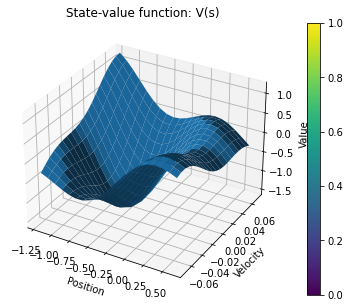

In [9]:
class TD0_State_Value_Approximation:
    """TD(0) State-value Learning with Function Approximation"""

    def __init__(self):
        """
        Init:
            gamma: discount factor
            preprocessing_states: preprocessing state features for better representation
            mdp: instance of environment, allowing to simulate action with self.mdp.step_from_state(current_state, action)
            theta: linear weight (function approximation)
        """
        self.gamma = 0.9
        n_components = 10  # You can change
        self.preprocessing_states = Pipeline([("scaler", StandardScaler()), ("feature_generation", RBFSampler(n_components=n_components))])
        self.preprocessing_states.fit(np.array([[np.random.uniform(-1.2, 0.6), np.random.uniform(-0.07, 0.07)] for _ in range(10000)]))
        self.mdp = Mountain()
        self.theta = np.zeros(n_components)  # Linear weight
        self.alpha = 1e-3
        self.epsilon = 0.1

    def preprocessing(self, state):
        """
        Return the featurized representation of a state.
        """
        return self.preprocessing_states.transform([state])[0]

    def act(self, state):
        """Output optimal action of a given state
        Return: action in [0, 1, 2]
        """

        Vs = np.array([self.v(self.mdp.step_from_state(state, action)[0]) for action in [0, 1, 2]])
        idx_best = np.argsort(-Vs)

        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(list(idx_best[1:]))
        else:
            return idx_best[0]

    def update(self, state, action, reward, new_state, terminal):
        """Receive a reward after performing given action.

        This is where your agent can learn. (Update theta.)
        Input:
            state: current state
            action: action done in state
            reward: reward received after doing action in state
            new_state: next state
            terminal: boolean if new_state is a terminal state or not
        """
        target = reward + self.gamma * self.v(new_state)
        self.theta = self.theta + self.alpha * (target - self.v(state)) * self.preprocessing(state)

    def v(self, state):
        """Final V function.
        Return:
            Value (scalar): V(state)
        """
        
        return np.dot(self.preprocessing(state), self.theta)

TD0_agent = test_agent(TD0_State_Value_Approximation, n_episodes=20)

In [11]:
play(TD0_agent)

Press q to stop...
Agent reached goal in 8.2s


Here, instead of computing the future rewards by playing the game, we approximate it using the value of the state $S_{t+1}$. We notice that the training of this method is significantly faster than the one before because we don't need to look into the future, we just approximate it. However, we also see that the agent needs to play more games (more episodes) for it to learn enough. Therefore, this approach of entirely approximating the future rewards isn't the best, and we can explore an in between approach. 

### n-step-TD State Value Approximation

Q.3 Implement the n-step-TD State Value Approximation

Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20


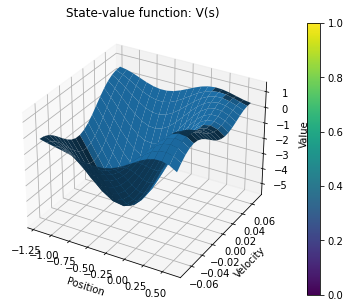

In [39]:

class n_steps_TD_State_Value_Approximation:
    """ TD(lambda) State-value Learning with Function Approximation
    http://www.incompleteideas.net/book/7/node2.html
    """

    def __init__(self):
        """
        Init:
            gamma: discount factor
            preprocessing_states: preprocessing state features for better representation
            mdp: instance of environment, allowing to simulate action with self.mdp.step_from_state(current_state, action)
            theta: linear weight (function approximation)
            lambda_value: Monte-Carlo step
        """
        self.gamma = 0.9
        n_components = 10 # You can change
        self.preprocessing_states = Pipeline([("scaler", StandardScaler()), ("feature_generation", RBFSampler(n_components=n_components))])
        self.preprocessing_states.fit(np.array([[np.random.uniform(-1.2, 0.6), np.random.uniform(-0.07, 0.07)] for _ in range(10000)]))
        self.mdp = Mountain()
        self.theta = np.zeros(n_components) # Linear weight
        self.mc_steps = 5 # Monte Carlo steps
        self.alpha = 1e-3
        self.epsilon = 0.1

    def preprocessing(self, state):
        """
        Return the featurized representation of a state.
        """
        return self.preprocessing_states.transform([state])[0]

    def act(self, state):
        """Output optimal action of a given state
        Return: action in [0, 1, 2]
        """

        Vs = np.array([self.v(self.mdp.step_from_state(state, action)[0]) for action in [0, 1, 2]])
        idx_best = np.argsort(-Vs)

        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(list(idx_best[1:]))
        else:
            return idx_best[0]


    def update(self, state, action, reward, new_state, terminal):
        """Receive a reward after performing given action.

        This is where your agent can learn. (Update theta.)
        Input:
            state: current state
            action: action done in state
            reward: reward received after doing action in state
            new_state: next state
            terminal: boolean if new_state is a terminal state or not
        """
        if terminal:
            self.theta = self.theta + self.alpha * (reward - self.v(state)) * self.preprocessing(state)
        else:
            done = False
            s = new_state
            target = reward
            for i in range(1, self.mc_steps):
                s, r, done = self.mdp.step_from_state(s, self.act(s))
                target += r * self.gamma**i
                i += 1
                if done:
                    break
            if not done:
                target += self.v(s) * self.gamma**self.mc_steps

            self.theta = self.theta + self.alpha * (target - self.v(state)) * self.preprocessing(state)


    def v(self, state):
        """Final V function.
        Return:
            Value (scalar): V(state)
        """

        return np.dot(self.preprocessing(state), self.theta)

n_steps_TD_agent = test_agent(n_steps_TD_State_Value_Approximation, n_episodes=20)

In [40]:
play(n_steps_TD_agent)

Press q to stop...
Agent reached goal in 8.3s


This is an in between approach, where instead of continuing the entire game to get the actual rewards, or approximating all future rewards by the value of the next state, we instead take few steps (n-steps) into the future to get the rewards, and approximate the rest by the value of the state $S_{t+n+1}$. The intuition here is that, since we have a discount factor, the rewards we get in the near future is very important and need to be computed explicitly, whereas the rewards we'll get after a certain amount of steps won't be as significant and could just be estimated using the value of the next state. We see that this approach works better than the others in the since where the training is fast, and the agent doesn't need as many episodes.

## Linear approximation of state-action Value Q(s, a)

We then  are going to consider a parametrized estimation of the value function $$q_\pi(s,a) \sim \hat{q}(s,a,\bold{\theta})$$ with parameters $\bold{\theta}$. 

Q.4 Implement the TD(0) State-Action Value Approximation

Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10


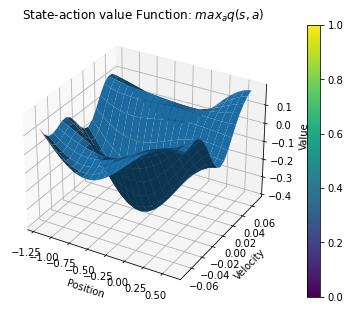

In [76]:
class TD0_Q_Learning_Function_Approximation:
    """ Q-Learning with Function Approximation
    """

    def __init__(self):
        """
        Init:
            gamma: discount factor
            preprocessing_states: preprocessing state features for better representation
            mdp: instance of environment, allowing to simulate action with self.mdp.step_from_state(current_state, action)
            theta: linear weight (function approximation)
        """
        self.gamma = 0.9
        n_components = 10
        self.preprocessing_states = Pipeline([("scaler", StandardScaler()), ("feature_generation", RBFSampler(n_components=n_components))])
        self.preprocessing_states.fit(np.array([[np.random.uniform(-1.2, 0.6), np.random.uniform(-0.07, 0.07)] for _ in range(10000)]))
        self.mdp = Mountain()
        self.list_actions = [0, 1, 2]
        self.theta = np.zeros(shape=(n_components, len(self.list_actions)))
        self.alpha = 1e-3
        self.epsilon = 0.1

    def preprocessing(self, state):
        """
        Return the featurized representation of a state.
        """
        return self.preprocessing_states.transform([state])[0]

    def act(self, state):
        """Output optimal action of a given state
        Return: action in [0, 1, 2]
        """

        
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.list_actions)
        else:
            return self.list_actions[self.q(state, self.list_actions).argmax()]

    def update(self, state, action, reward, new_state, terminal):
        """Receive a reward for performing given action.

        This is where your agent can learn. (Update self.theta)
        Input:
            state: current state
            action: action done in state
            reward: reward received after doing action in state
            new_state: next state
            terminal: boolean if new_state is a terminal state or not
        """
        
        if terminal:
            q_new_state = 0
        else:
            q_new_state = np.max(self.q(new_state, self.list_actions))

        self.theta[:, action] = self.theta[:, action] + self.alpha * (
            reward + self.gamma * q_new_state - self.q(state, action)
        ) * self.preprocessing(state)


    def q(self, state, action):
        """Final Q function.Value (scalar): Q(state, action)
        """

        return np.dot(self.preprocessing(state), self.theta[:, action])

TD0_Q_Learning_agent = test_agent(TD0_Q_Learning_Function_Approximation, n_episodes=10)

In [78]:
play(TD0_Q_Learning_agent)

Press q to stop...
Agent reached goal in 13.2s


This implementation/idea is very similar to the one we had in Q2 where we approximated the next rewards by the value of the next state. Here, that reward is being approximated it by: $$\max_{a}Q(S_{t+1},a)$$ Another difference is that, since Q is a function of both the state and the action, we need a different $\theta$ per action. Therefore, I created $\theta$ as a two dimensional array of shape $(n\_components, n\_actions)$. Notice that in the update, we only update the $\theta$ of the taken action.

## (BONUS ) Deep Q-network

The paper https://arxiv.org/pdf/1312.5602.pdf explore a method of training neural network using Experience Replay. 

You have to store the agent experience (observation,action,reward,next_state) in memory D and apply Q-Learning on samples drawn from D. 

BONUS : Implement the deep Q-network algorithm : https://arxiv.org/pdf/1312.5602.pdf

The idea here as I understood and implement is the following:
1. The network is a normal Deep Neural Network (MLP for example), where the input is the state (feature representation of a state), and the output is a Q value for each action. The goal is that this NN will learn to compute the Q value of all actions given a state, which will then allow us to choose an action using a greedy policy.
2. The loss at a step $t$ is computed as $$ R_t + \gamma \max_{a} q_*(s_{t+1},a) - q(s_t, a_t)$$ such that $q(s_t, a_t)$ is computed by forwarding the state $s_t$ to the network and taking the output associated to the action $a_t$. On the other hand, $q_*(s_{t+1},a)$ needs to be a separate target network that doesn't update at each step. The reason being each time we update the target network, the loss changes. And if we change the loss at each time we update the our main network, the network would be like if it's a dog chasing its tail. Therefore, we update the target network as a copy of the main network only every certain number of steps.   
3. As we play games, take actions, and get rewards, we save all that in a replay memory. We then sample a batch from our replay memory to train the network. The reason we do that is to avoid that the network only sees the batch as an ordered sequence. 
4. During the training, we play a certain number of games. For each game, we play until the game ends (or up to a certain number of max steps). For each step, we do the following :
    - we choose an action following exploration-exploitation method. In the case, of exploitation, we use the network to compute the Q values of actions and take the one that maximizes it.
    - we take a step with the chosen action, and save all the information we get (state, action, reward, new\_state) into our replay memory.
    - we sample a batch from the replay memory.
    - we forward our batch through the target network to compute $q_{*}(s_{t+1}, a)$.
    - we compute the loss following the formula we saw before.
    - we update the weight of the model using gradient descent.
    - we may copy the new weights of the network to the target network (in some iterations). 
    

In [14]:
import gym
import torch 
import torch.nn as nn
import torch.nn.functional as F
from copy import deepcopy
import matplotlib.pyplot as plt

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'


In [15]:
class QNetwork(nn.Module):
    def __init__(self, n_components=10, hidden_dim=10):
        super(QNetwork, self).__init__()
        self.n_components = n_components
        self.preprocessing_states = Pipeline([("scaler", StandardScaler()), ("feature_generation", RBFSampler(n_components=n_components))])
        self.preprocessing_states.fit(np.array([[np.random.uniform(-1.2, 0.6), np.random.uniform(-0.07, 0.07)] for _ in range(10000)]))
        self.list_actions = [0, 1, 2]
        self.input_dim = self.n_components
        self.hidden_dim = hidden_dim
        self.output_dim = len(self.list_actions)
        self.q = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_dim),
            nn.ReLU(),
            nn.Linear(self.hidden_dim, self.output_dim),
        ).to(device)

    def preprocessing(self, states):
        """
        Return the feature representation of a state.
        """
        return torch.tensor(self.preprocessing_states.transform(states), dtype=torch.float32)

    def forward(self, states):
        if len(states.shape) == 1:   # accept also one state
            states = [states]
        states = self.preprocessing(states)
        return self.q(states)
    
q_network = QNetwork()

env = gym.make("MountainCar-v0")
states = np.empty((10,2))
for i in range(states.shape[0]):
    states[i] = env.reset()[0]
q_network(states)

tensor([[-4.3423e-01, -1.2710e-03,  6.2734e-02],
        [-4.4397e-01,  4.6451e-03,  8.3564e-02],
        [-4.3618e-01, -8.6527e-05,  6.6909e-02],
        [-4.0190e-01, -2.1272e-02, -8.0920e-03],
        [-4.0464e-01, -1.9528e-02, -1.8888e-03],
        [-4.3095e-01, -3.2669e-03,  5.5695e-02],
        [-4.4554e-01,  5.5984e-03,  8.6915e-02],
        [-4.4418e-01,  4.7731e-03,  8.4014e-02],
        [-4.0535e-01, -1.9078e-02, -2.8941e-04],
        [-3.6292e-01, -3.3902e-02, -5.6655e-02]], grad_fn=<AddmmBackward0>)

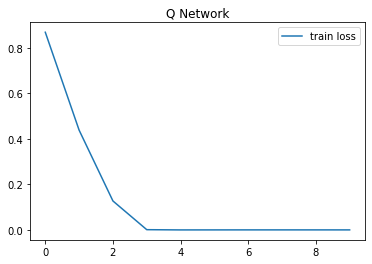

In [16]:
max_steps = 100
n_episodes = 10
memory_size = n_episodes*max_steps
memory_index = 0
memory = torch.empty((memory_size, 6))
env = Mountain()
q_network = QNetwork()
q_target = QNetwork()
target_model_update_freq = 50
epsilon = 0.1
gamma = 0.9
list_actions = [0, 1, 2]
batch_size = 64
optimizer = torch.optim.Adam(q_network.parameters(), lr=1e-3)
q_network.train()
loss_train = []
for episode in range(n_episodes):
    env.reset()
    state = env.state
    done = False
    step = 0
    losses_train = [] 
    while not done and step < max_steps:
        optimizer.zero_grad()
        # choose action and act
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(list_actions)
        else:
            action = list_actions[q_network(state).squeeze().argmax()]
        new_state, reward, done = env.step_from_state(state, action)

        # save in the memory
        memory[memory_index] = torch.tensor(
            [state[0], state[1], action, reward, new_state[0], new_state[1]]
        )

        # draw a sample
        sample_size = min(batch_size, memory_index + 1)
        current_memory = memory[: memory_index + 1]
        perm = torch.randperm(current_memory.size(0))
        batch = current_memory[perm[:sample_size]]

        # read batch
        batch_states = batch[:, :2]
        batch_actions = batch[:, 2].to(int)
        batch_reward = batch[:, 3]
        batch_new_states = batch[:, 4:]

        # forward the batch
        q_values_output = q_network(batch_states)[
            range(batch_actions.size(0)), batch_actions
        ]  # advanced indexing to get q_values of the actions

        # compute loss
        if memory_index % target_model_update_freq == 0:
            q_target.load_state_dict(q_network.state_dict())
        q_values_target = q_target(batch_new_states).max(dim=1)[0]
        
        loss = ((batch_reward + gamma*q_values_target) - q_values_output)**2
        loss = loss.mean()
        losses_train.append(loss.item())
        # update with gradient descent 
        loss.backward()
        torch.nn.utils.clip_grad_norm_(q_network.parameters(), 5)
        optimizer.step()
        memory_index += 1
        step += 1

    loss_train.append(sum(losses_train)/len(losses_train))

plt.plot(np.arange(len(loss_train)), loss_train, label=f"train loss")
plt.legend()
plt.title(f"Q Network")
plt.show()

Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10


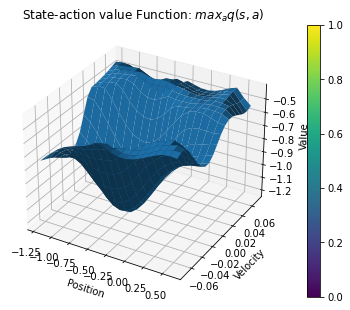

In [17]:
class Deep_Q_Learning_Function_Approximation:
    """ Deep Q-Learning with Function Approximation
    """

    def __init__(self):
        """
        Init:
            mdp: instance of environment, allowing to simulate action with self.mdp.step_from_state(current_state, action)
        """
        self.q_network = q_network
        self.q_network.eval()
        self.mdp = Mountain()
        self.list_actions = [0, 1, 2]


    def act(self, state):
        """Output optimal action of a given state
        Return: action in [0, 1, 2]
        """

        return self.list_actions[self.q(state, self.list_actions).argmax()]

    def update(self, state, action, reward, new_state, terminal):
        """Receive a reward for performing given action.

        This is where your agent can learn. (Update self.theta)
        Input:
            state: current state
            action: action done in state
            reward: reward received after doing action in state
            new_state: next state
            terminal: boolean if new_state is a terminal state or not
        """
        
        pass

    def q(self, state, action):
        """Final Q function.Value (scalar): Q(state, action)
        """

        return self.q_network(state).squeeze().detach().numpy()[action]

Deep_Q_Learning_agent = test_agent(Deep_Q_Learning_Function_Approximation, n_episodes=10)

In [18]:
play(Deep_Q_Learning_Function_Approximation())

Press q to stop...
